<div style='padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Applied Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Lab: CAN Response</div>
        </div>
    </div>
</div>

##### Authors:
* Carl Tape ([@carltape](https://github.com/carltape))
* Yongki Aiman
* Tomy Gunawan
* Angel Ling
---

based on *GEOS 626: Applied Seismology from Carl Tape*

---

### CAN response

This script shows some conventions for instrument response files associated with GISMO/Antelope and rdseed/sac.
 
calls numerous GISMO functions and also read_pzfile.m

The example waveform is from CAN (Canberra, Australia) for the 2004 Mw 9.X Sumatra-Andaman earthquake.

In [25]:
# Preparation for programming
# Make sure to execute this cell first!
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal.cross_correlation import xcorr_pick_correction
import numpy as np
import matplotlib.pylab as plt
import os
import glob
import wave
import struct
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['lines.linewidth'] = 1

1 Trace(s) in Stream:
G.CAN..LHZ | 2004-12-25T13:00:00.655900Z - 2005-01-04T00:59:58.655900Z | 1.0 Hz, 820799 samples


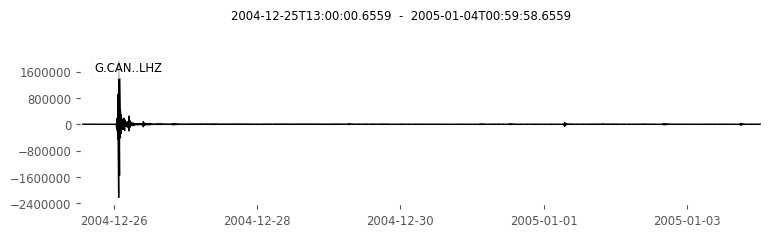

In [24]:
# Getting the waveforms

client = Client("IRIS")
t = UTCDateTime("2004-12-26T01:00:0.0")

st = client.get_waveforms("G", "CAN", "*", "LHZ", t-(12*3600), t+(9*24*3600), attach_response=True)
print(st)

st.plot()

(-30000, 30000)

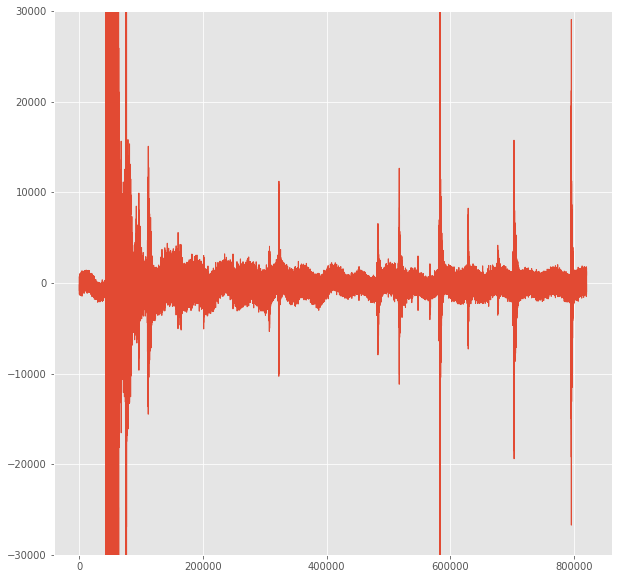

In [31]:
# Plotting signals
tr = st[0]
trace_data = tr.data
plt.plot(tr.data)
plt.ylim(-30000,30000)

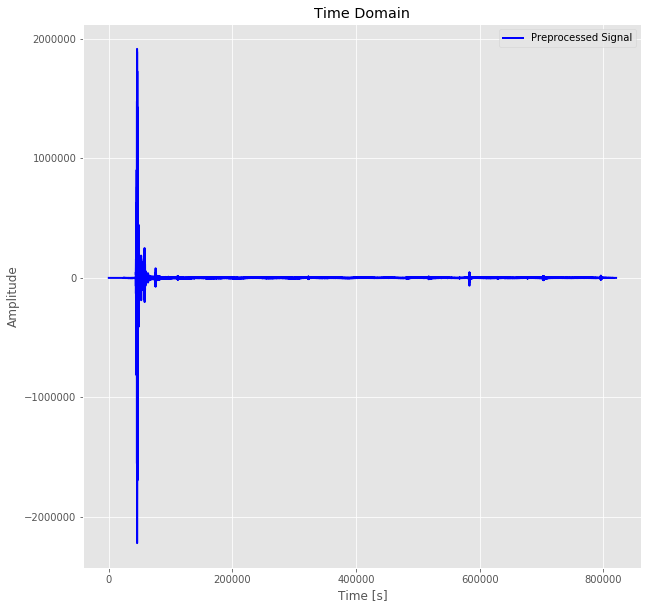

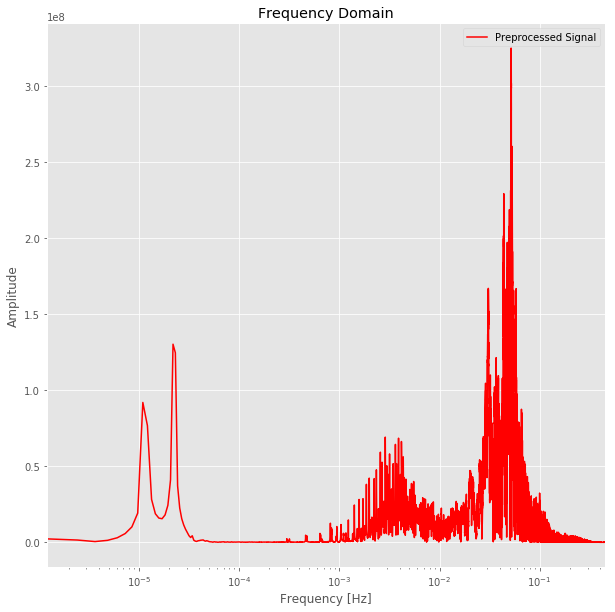

In [42]:
#Pre-Process Data 
from obspy.signal.filter import lowpass
from matplotlib.mlab import detrend
from obspy.signal.invsim import cosine_taper 

# take a copy of the stream to avoid overwriting the original data
can = st.copy()

# Choosing the 1st stream, Specify sampling parameters and Nyquist frequency
npts = can[0].stats.npts              # number of samples
df = can[0].stats.sampling_rate       # sampling rate
nsec = npts/df                        # sampling time
fNy = df / 2.0                        # Nyquist frequency
time = np.linspace(0,nsec,(nsec*df))  # time axis for plotting

y  = can[0].data                      # set up signal   

# Taper
taper_percentage = 0.1                          # Percentage of tapering applied to signal
taper = cosine_taper(npts,taper_percentage)    # Define cosine taper to be used
y_taper = y * taper                         # Taper signal

# Detrend Signal
y_detrend = detrend(y_taper, 'linear')

# Frequency Domain
y_fnew = np.fft.rfft(y_detrend) 

# Plot the result
freq = np.linspace(0, fNy, len(y_fnew))         # Frequency axis for plotting
plt.plot(time, y_detrend, 'b', label="Preprocessed Signal", lw=2) # Plot in Time Domain
plt.legend()
plt.title('Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

plt.semilogx(freq, abs(y_fnew), 'r', label="Preprocessed Signal", lw=1.5) # Plot in Frequency Domain
plt.legend()
plt.title('Frequency Domain')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0.0, 0.45)
plt.show()

In [ ]:
#st[0].remove_response(output="VEL", pre_filt=None, water_level=30, zero_mean=True, taper=True, taper_fraction=0.05, 
                   #plot=False)
#st[1].remove_response(output="VEL", pre_filt=None, water_level=30, zero_mean=True, taper=True, taper_fraction=0.05, 
                   #plot=False)
#st[2].remove_response(output="VEL", pre_filt=None, water_level=30, zero_mean=True, taper=True, taper_fraction=0.05, 
                   #plot=True)